# PH3022-Machine Learning and Neural Computation-Assignment_08

# Q1

# feedforward:

- Input: The network takes raw data as input (e.g., image pixel values).
- Weighted Sum: Each neuron multiplies inputs by weights and adds a bias:
$$z = \sum (input \cdot w) + b$$
- Activation: The value z goes through an activation function (ReLU, Sigmoid, etc.) to add non-linearity.
- Layer-by-Layer Flow: The output of one layer becomes the input to the next layer.
- Output: The final layer gives the prediction (e.g., 90% probability of a cat).
- Key Point: Data moves only forward, from input to hidden layers to output.

# backpropagation:

- Goal: Find out how much each weight and bias caused the prediction error.
- Chain Rule: Starting from the output and moving backward, calculus (chain rule) is used to compute gradients—how each weight affects the loss.
- Propagating Error (Assigning Blame): The error is passed backward layer-by-layer, telling each neuron how responsible it was for the mistake.
- Gradient Descent: Weights are updated to reduce the error:
$$W_{new} = W_{old} - (\text{Learning Rate} \times \text{Gradient})$$
- Learning Rate: Controls the step size of updates.
    - Too large: May overshoot the best solution
    - Too small: Training becomes very slow or may get stuck
- Key Point: Data flows backward to learn, then forward again to predict better next time.

# Q2

# Activation function

- An Activation Function is a mathematical function that decides whether a neuron should activate and how strong its output should be.
- It takes the input value and controls what gets passed to the next layer.
- Without activation functions, a neural network becomes just a linear model and cannot learn complex, real-world patterns.
- Activation functions add non-linearity, allowing the network to learn images, speech, and language.
- They limit (squash) outputs to a certain range, preventing values from becoming too large or meaningless.
- Common Activation Functions:
    - ReLU (Rectified Linear Unit): Outputs the input if it’s positive, otherwise outputs 0.
    - Sigmoid: Outputs values between 0 and 1; often used for binary (Yes/No) classification.
    - Tanh: Outputs values between -1 and 1; zero-centered and useful in hidden layers.

# Cost function

The Cost Function is at the end of the process. It is a formula used to measure how well the entire model is performing across the whole dataset.

While a Loss Function measures the error for a single piece of data (one image), the Cost Function is the average of all those losses across the entire training set.

The goal of training a model is to "minimize the cost." A high cost means the model’s predictions are very different from the actual results; a low cost means the model is highly accurate.

During Backpropagation, the network uses the cost function's value to figure out how much to change its weights and biases.

Examples:
- Mean Squared Error (MSE): Used for regression. It squares the differences between predictions and actual values.
- Cross-Entropy Loss: Used for classification. It measures the difference between two probability distributions.

# Q3

1. The Forward Pass: Data flows through the network, and the Cost Function calculates a single number representing the total error. This "Cost" is the target that neede to be minimize.
   
2. Backpropagation: The algorithm starts at the final error and moves backward toward the input to find the Gradient ($\nabla$) for every single weight. A gradient is a vector that points toward the steepest increase in error. Because the network is a chain of functions ($Output = Act(Weight \times Input + Bias)$), the chain rule is used to determine how a tiny change in a weight deep in the network affects the final cost at the output.

3. Gradient Descent: Now that the network knows which direction makes the error worse (the positive gradient), it moves in the opposite direction (the negative gradient) to make the error smaller.
- The Formula: $$W_{new} = W_{old} - (\eta \times \nabla)$$
- $\eta$ (Learning Rate): The size of the step is determined. If a step that is too large is taken, the "valley" (the minimum) might be jumped over. If a step that is too small is taken, it will take a very long time to reach it.
  
4. Iteration: The network repeats this loop thousands of times. As the gradient gets smaller (the slope flattens), the updates become smaller. Eventually, the network reaches the "bottom" of the cost function, where the error is as low as possible. This is called Convergence.

# Q4

# Epochs

An epoch is one complete pass of the entire training dataset through the neural network.

During one epoch, the model sees all training examples once.

Training usually requires many epochs to learn patterns well.

Example: If a dataset has 1,000 samples then in one epoch all 1,000 samples used once for training.

More epochs causes better learning. But too many epochs causes overfitting





# Batch size

Batch size is the number of training samples processed at one time before updating the model's weights.

Instead of updating weights after every single sample, data is divided into batches.

After one batch is processed, weights are updated once.

Example: Dataset = 1,000 samples, Batch size = 100, Number of batches per epoch = 10

Common types
- Batch size = 1: Stochastic Gradient Descent (SGD)
- Batch size = dataset size: Batch Gradient Descent
- Medium batch size: Mini-batch Gradient Descent (most common)

# Optimizer

An optimizer is an algorithm that updates the model’s weights and biases to minimize the cost function.

It decides how much and in which direction to change the weights.

Optimizers use gradients computed by backpropagation.

Examples of optimizers
- Gradient Descent
- Stochastic Gradient Descent (SGD)
- Momentum
- RMSprop
- Adam (very popular)

Why optimizers matter,
- Affect training speed
- Help avoid local minima
- Improve convergence stability

# Q5

# Develop and run the DNN model and Explain each line of the code.

In [14]:
# Importing required packages
# Imports NumPy for numerical operations
import numpy as np
# Import tensorFlow for building the neural network
import tensorflow as tf
# Loads the built-in diabetes regression dataset
from sklearn.datasets import load_diabetes
# Used to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Used to normalize input features
from sklearn.preprocessing import StandardScaler

# Load Diabetes dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)

# Split dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the DNN model with: Input layer, Three hidden layers and One output neuron (regression problem)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile model with Loss function:Mean Squared Error and Metric: Mean Absolute Error
model.compile(
    optimizer=optimizer,
    loss="mean_squared_error",
    metrics=["mae"]
)

# Trains the model for 50 epochs using batches of 8 samples
model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test)
)

# Evaluates model performance on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 17253.4922 - mae: 106.5723 - val_loss: 4132.4805 - val_mae: 49.0654
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3924.0693 - mae: 49.0458 - val_loss: 3356.1714 - val_mae: 45.2230
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3203.4797 - mae: 44.4398 - val_loss: 3350.9119 - val_mae: 47.2915
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3173.8113 - mae: 44.6603 - val_loss: 3192.1677 - val_mae: 45.5108
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2992.0637 - mae: 43.4765 - val_loss: 2984.5977 - val_mae: 44.2843
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2875.9922 - mae: 42.7200 - val_loss: 3179.3445 - val_mae: 45.0896
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3030.3123 - mae: 44.2378 - val_loss: 2944.0132 - val_mae: 43.3646
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2839.9412 - mae: 42.4840 - val_loss: 3000.1250 - val_mae: 44.2495
Epoch

# Draw the Actual y Vs predicted y graph for the above program

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


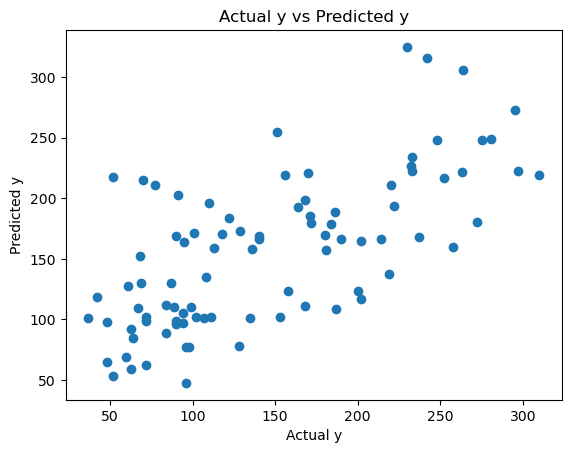

In [15]:
y_pred = model.predict(X_test)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual y vs Predicted y")
plt.show()

# Modified model:
- Four hidden layers: 20, 10, 8, 4 neurons
- Activation function: Tanh
- Loss function: Mean Absolute Error
- Metric: Mean Squared Error
- Optimizer: Stochastic Gradient Descent
- Epochs: 100
- Batch size: 200

In [16]:
# Importing required packages
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Diabetes dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the DNN model (recommended way)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation="tanh", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation="tanh"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1)
])

# Optimizer
optimizer = tf.keras.optimizers.SGD()

# Compile model
model.compile(
    optimizer=optimizer,
    loss="mean_absolute_error",
    metrics=["mean_squared_error"]
)

# Train model
model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=200,
    validation_data=(X_test, y_test)
)

# Evaluate model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")


Epoch 1/100


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 485ms/step - loss: 153.7205 - mean_squared_error: 29650.4902 - val_loss: 145.8183 - val_mean_squared_error: 26515.8652
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 153.6585 - mean_squared_error: 29631.8047 - val_loss: 145.7572 - val_mean_squared_error: 26498.3867
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 153.5964 - mean_squared_error: 29613.0645 - val_loss: 145.6959 - val_mean_squared_error: 26480.9824
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 153.5336 - mean_squared_error: 29594.2129 - val_loss: 145.6343 - val_mean_squared_error: 26463.5254
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 153.4705 - mean_squared_error: 29575.5742 - val_loss: 145.5720 - val_mean_squared_error: 26445.9805
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 153.4065 - mean_squared_error: 29556.6465 - val_loss: 145.5087 - val_mean_squared_error: 26428.2227
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss:

# Comment on the accuracy of the model developed in part d

Based on the training and testing results of the modified model (part d), the following observations can be made:
- The model learns slowly but steadily during the 100 training epochs.
- The test loss (MAE ≈ 134.95) is relatively high, which means the predictions are not very accurate.
- The high mean squared error indicates that some predicted values are far from the actual values.
- Using Stochastic Gradient Descent with a large batch size causes slow learning.
- The model is stable and does not overfit, but its accuracy is lower than models using optimizers like Adam.

Conclusion:
- The modified DNN model shows stable learning but moderate to low accuracy. The performance can be improved by using a better optimizer or adjusting the training parameters.

# Q6

# Q6.a

Learning Rate: Perhaps the most important; it controls how much the weights change in response to the estimated error each time the model weights are updated.

Number of Hidden Layers & Neurons: Defines the capacity and complexity of the network.

Activation Functions: Decisions on whether to use ReLU, Sigmoid, or Tanh in hidden layers.

Batch Size: The number of training examples used in one iteration.

Optimizer: Algorithms like Adam, SGD, or RMSprop.

Dropout Rate: A regularization technique to prevent overfitting.

# Q6.b

Cross-Entropy Loss (Categorical Cross-Entropy): This is the standard loss function for multi-class tasks. It measures the performance of a classification model whose output is a probability value between 0 and 1.Formula: If $y$ is the true label and $\hat{y}$ is the predicted probability:$$Loss = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)$$

# Q6.c

In [12]:
import os
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from scikeras.wrappers import KerasClassifier
import tensorflow as tf

# Suppress the retracing warnings for cleaner output
tf.get_logger().setLevel('ERROR')

# 1. Load and Preprocess
iris = load_iris()
X, y = iris.data, iris.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Updated Model Function (Keras 3 syntax)
def create_model(optimizer='adam', neurons=8):
    model = Sequential([
        Input(shape=(4,)), # Modern way to define input
        Dense(neurons, activation='relu'),
        Dense(neurons, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 3. Hyperparameter Tuning
# Reduced cv to 2 and epochs for a faster test run
model = KerasClassifier(model=create_model, verbose=0)
param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__neurons': [8, 16],
    'epochs': [50] 
}

print("Starting Grid Search... (this may take a minute)")
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2) 
grid_result = grid.fit(X_train, y_train)

print(f"\nBest: {grid_result.best_score_:.4f} using {grid_result.best_params_}")

Starting Grid Search... (this may take a minute)

Best: 0.8333 using {'epochs': 50, 'model__neurons': 16, 'model__optimizer': 'adam'}


# Q6.d

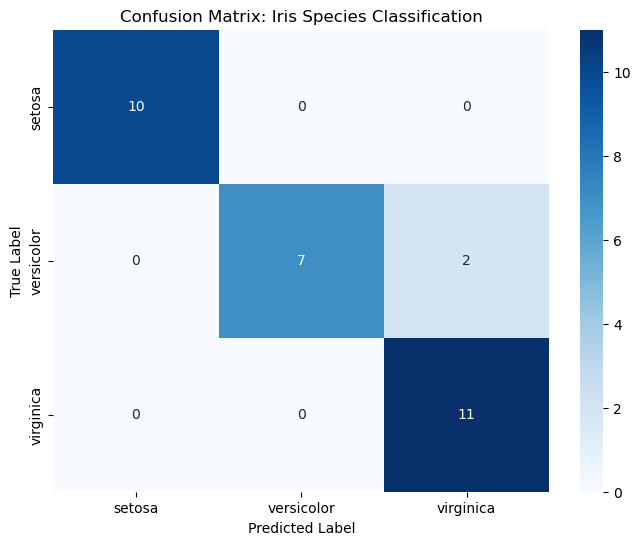


--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = grid.predict(X_test)

if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
    y_pred = np.argmax(y_pred, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix: Iris Species Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n--- Classification Report ---")
print(classification_report(y_test_labels, y_pred, target_names=iris.target_names))